Notebook for Testing already built Models

In [12]:
#Import necessary modules
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from io import BytesIO
import urllib

In [2]:
#Import data-set if available, else: don't compile this kernel
path = "G:/Python/data/10_animals"
height = width = 300

data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size = (height, width)
)

classes = data.class_names

Found 32086 files belonging to 10 classes.


In [3]:
#Hard-code classes if unable to import data-set - example given for animal-cnn
classes = ['cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel', 'turtle'] #Get from Notebook

In [4]:
#Import pretrained cnn
model = tf.keras.models.load_model("C:/Users/maxis/Desktop/Proseminar - CNN/Models/animals_10_69_val_accuracy.h5") #Change path with your path to pretrained model

In [24]:
def get_image_from_github(URL):
    with urllib.request.urlopen(URL) as url:
        img = tf.keras.preprocessing.image.load_img(BytesIO(url.read()), target_size=(300,300))
    return tf.keras.preprocessing.image.img_to_array(img)

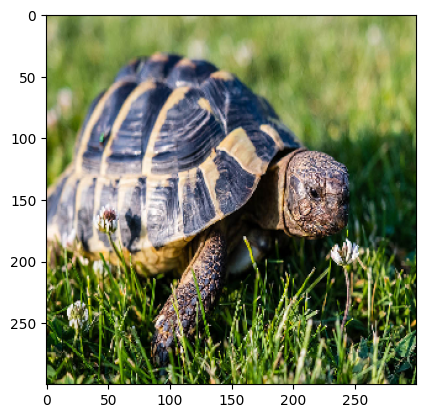

1/1 [==============================] - 0s 15ms/step

Image predicted to be turtle with confidence of 94.851%
Image predicted to be dog with confidence of 1.505%
Image predicted to be chicken with confidence of 1.457%
Image predicted to be sheep with confidence of 1.242%
Image predicted to be squirrel with confidence of 0.629%


In [49]:
#Generate predictions using new images
img = r"https://raw.githubusercontent.com/hahnfabian/CNN/main/Images%20to%20test/turtle1.jpg" #Swap String to path from downloaded image or provide URL to image

try:
    urllib.request.urlopen(img)
    img = get_image_from_github(img)
    plt.imshow(img.astype(np.uint8))
except:
    img = tf.keras.preprocessing.image.load_img(img, target_size=(300,300))
    plt.imshow(img)

plt.show()

img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)

print()

prediction_probabilities = tf.math.top_k(prediction, k=5)
top_5_scores = prediction_probabilities.values.numpy().tolist()
dict_class_entries = prediction_probabilities.indices.numpy().tolist()
for label, confidence in zip(dict_class_entries[0], top_5_scores[0]):
    print(f"Image predicted to be {classes[label]} with confidence of {round(confidence*100, 3)}%")